<a href="https://colab.research.google.com/github/Tariku0717/Data-Preprocessing-for-ML-using-Titanic-Dataset/blob/main/cloning_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
url = "https://raw.githubusercontent.com/softwareWCU/Data-Preprocessing-for-ML-using-Titanic-Dataset/main/titanic2.csv"
df = pd.read_csv(url)

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
url = "https://raw.githubusercontent.com/softwareWCU/Data-Preprocessing-for-ML-using-Titanic-Dataset/main/titanic2.csv"
df = pd.read_csv(url)

In [9]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  909 non-null    int64  
 1   Survived     909 non-null    int64  
 2   Pclass       909 non-null    object 
 3   Name         909 non-null    object 
 4   Sex          909 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        909 non-null    int64  
 7   Parch        909 non-null    int64  
 8   Ticket       909 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        208 non-null    object 
 11  Embarked     907 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 85.3+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            199
SibSp            0
Parch            0
Ticket           0
Fare            18
Cabin          701
Embarked         2
dtype: int6

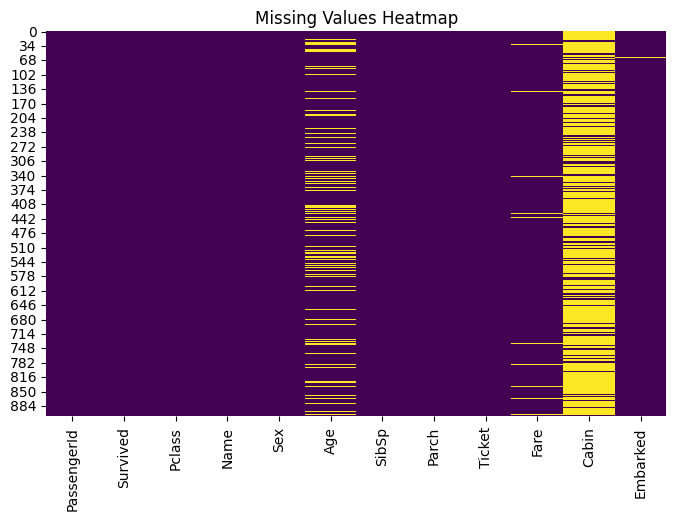

In [10]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [11]:
df = df.drop(columns=["Cabin"])
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [14]:
import re
def extract_title(name):
    title_search = re.search(r",\s*([^.]*)\.", name)
    if title_search:
        return title_search.group(1).strip()
    return ""
df["Title"] = df["Name"].apply(extract_title)
rare_titles = df["Title"].value_counts()[df["Title"].value_counts() < 10].index
df["Title"] = df["Title"].replace(rare_titles, "Rare")

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsMale"] = df["Sex"].map({"male": 1, "female": 0})

In [15]:
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Sex"])

In [17]:
for col in ["Fare", "Age"]:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower, upper)

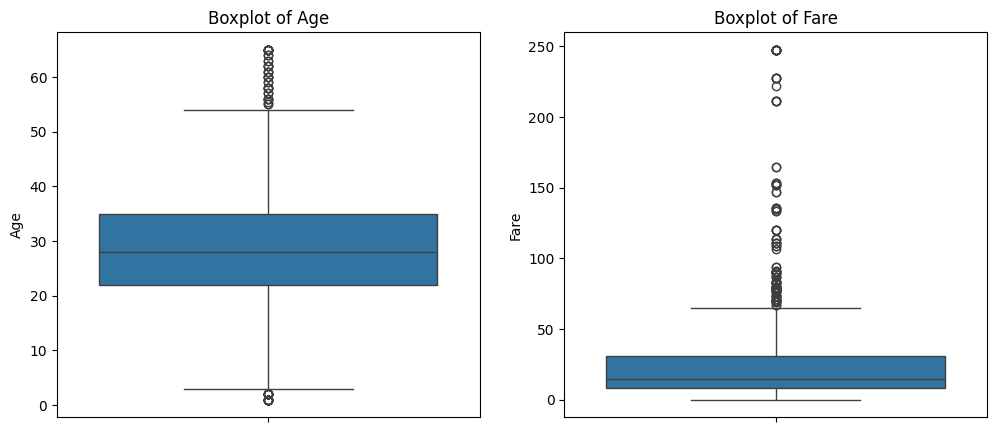

In [19]:
plt.figure(figsize=(12,5))
for i, col in enumerate(["Age", "Fare"]):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
plt.show()

In [20]:
categorical_features = ["Embarked", "Title"]
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [21]:
X = df.drop("Survived", axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [33]:
url = "https://raw.githubusercontent.com/softwareWCU/Data-Preprocessing-for-ML-using-Titanic-Dataset/main/titanic2.csv"
df = pd.read_csv(url)


In [34]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [35]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Split dataset
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)